## Linear Discriminant Functions and Support Vector Machines
### Siddheswar Chandrasekhar
<br>

### Part 1
##### We train a Support Vector classifier using the MNIST training dataset and report performance using MNIST testing dataset

In [13]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Author: Siddheswar C
# @Email: innocentdevil.sid007@gmail.com


import tensorflow as tf
import numpy as np
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [14]:
class ConfusionMatrix:

    # Calculate Confusion Matrix
    @staticmethod
    def calculate(y, yhat):
        return confusion_matrix(y, yhat)

    # Plot Confusion Matrix
    @staticmethod
    def plot(title, confusion, matrix_dimension):
        plt.clf()
        plt.xlabel('Actual Target (y)')
        plt.ylabel('Predicted Target (yhat)')
        plt.grid(False)
        plt.xticks(np.arange(matrix_dimension))
        plt.yticks(np.arange(matrix_dimension))
        plt.title(title)
        plt.imshow(confusion, cmap=plt.cm.jet, interpolation='nearest')

        for i, cas in enumerate(confusion):
            for j, count in enumerate(cas):
                if count > 0:
                    xoff = .07 * len(str(count))
                    plt.text(j - xoff, i + .2, int(count), fontsize=9, color='white')

In [15]:
def support_vector_machine(training_data, training_label, test_data, test_label):
    confusion_mat = ConfusionMatrix()

    print('Performing SVM')

    # Classify as SVM
    classifier = svm.SVC(C=1.0, kernel='linear', gamma='scale')

    # Perform Training
    classifier.fit(training_data, training_label)

    # Predict
    yhat = classifier.predict(test_data)

    accuracy = metrics.accuracy_score(test_label, yhat)
    confusion = confusion_mat.calculate(test_label, yhat)
    confusion_mat.plot('SVM on MNIST dataset', confusion, confusion.shape[0])

    return accuracy, confusion

Loading MNIST data
Performing SVM
Accuracy: 94.04%


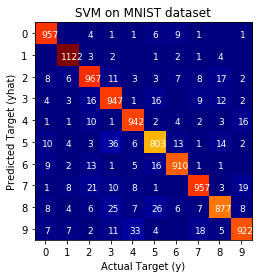

In [16]:
# Read and process the dataset
print('Loading MNIST data')
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

IMAGE_SIZE = x_train.shape[-1]

x_train = x_train.reshape((-1, IMAGE_SIZE*IMAGE_SIZE))
x_test = x_test.reshape((-1, IMAGE_SIZE*IMAGE_SIZE))

accuracy, confusion = support_vector_machine(x_train, y_train, x_test, y_test)
print('Accuracy: ' + str(accuracy*100) + '%')

### Part 2
##### We identify the Lagrange dual problem given a primal problem

\begin{align*}
\text{minimize  } \frac{1}{2}w^T.w+C \sum_{n=1}^{N} \xi_{i}
\\
\text{subject to } y_i.(w^T.x_i) \geq {1-\xi_{i}} \text{ and } \xi_i \geq 0 \text{ for i }=1,...,N
\end{align*}
The margin is :
 $\gamma = \frac{1}{\sqrt{w^T.w +C \sum_{i=1}^{N} \xi_i }}$

#### Lagrange function :

\begin{align}
{\mathcal{L}} = \frac{1}{2} {\overrightarrow{w}}^T\overrightarrow{w} + C \sum_{i=1}^N\xi_i + \Sigma_i\alpha_i(1-y_i.w^Tx_i -\xi_i) - \sum_{i=1}^N \beta_i \xi_i
\end{align}
<br><br>
Lagrange multipliers $\alpha \geq 0$, $ \beta \geq 0$,<br>
Inequality constraints $1 - y_i(w^Tx_i) - \xi_i \leq 0$ and $\xi_i \geq 0$ for $i=1,...,N$
<br><br>
#### Claim: <br>
$\underbrace{\underset{\alpha,\beta}{max} \underset{w,\xi}{min} \mathcal{L}}_\text{dual solution} \leq \underbrace{\underset{w,\xi}{min} \underset{\alpha,\beta}{max} \mathcal{L}}_\text{primal solution}$

\begin{align}
{\mathcal{L}} = \frac{1}{2} {\overrightarrow{w}}^T\overrightarrow{w} + C \sum_{i=1}^N\xi_i + \Sigma_i\alpha_i(1-y_i.w^Tx_i -\xi_i) - \sum_{i=1}^N \beta_i \xi_i
\end{align}

\begin{align}
\\
  \frac{\partial_{\mathcal{L}}}{\partial_w} = w - \sum_i \alpha_i y_i x_i = 0 \implies w = \sum_i \alpha_i y_i \overrightarrow{x_i}
  \\
  \frac{\partial_{\mathcal{L}}}{\partial_\xi} = 0 \implies C - \alpha_i - \beta_i = 0
  \\ 
  \implies 0 \leq \alpha_i \leq C \text{ and } \beta_i \geq 0
\end{align}

\begin{align}
\text {Substituting } w = \sum_i \alpha_i y_i \overrightarrow{x_i}, C=\alpha_i + \beta_i
\text { into Lagrange function, we get the dual problem of maximizing: }
\end{align}

\begin{align}
{\mathcal{L}} = \frac{1}{2} w^T \sum_i \alpha_i y_i \overrightarrow{x_i} + (\alpha_i + \beta_i) \sum_{i=1}^N\xi_i + \Sigma_i\alpha_i(1-y_i.w^Tx_i -\xi_i) - \sum_{i=1}^N \beta_i \xi_i
\\= \frac{1}{2} w^T \sum_i \alpha_i y_i \overrightarrow{x_i} + \alpha_i\sum_{i=1}^N\xi_i + \beta_i \sum_{i=1}^N\xi_i +\sum_i \alpha_i - w^T \sum_i \alpha_i y_i \overrightarrow{x_i} - \sum_i \alpha_i \xi_i - \sum_{i=1}^N \beta_i \xi_i
\end{align}

\begin{align}
\\=\sum_i \alpha_i- \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j (\overrightarrow{x_i}^T x_j )
\end{align}


The primal margin is :
 $\gamma = \frac{1}{\sqrt{w^T.w +C \sum_{i=1}^{N} \xi_i }}$
 
The dual margin is :
$\gamma = \frac{1}{\sqrt{\alpha_i \alpha_j y_i y_j (x_i^T x_j )}}$

#### Benefits of maximizing the margin

Maximizing the margin helps avoid overfitting. We may have found a hyperplane that completely seperates the classes in our training set, but a situation may arise that when a new data comes in, it is classifies on the wrong side of the hyperplane. This would happen when the hyperplane is oriented too close to the training data points.
A large margin would help generalize the model and make better predictions on new datasets.

#### Characterize the support vectors

* Lying on the margin boundaries w^T x + b = −1 and w^T x + b = +1 (ξn = 0)

* Lying within the margin region (0 < ξn < 1) but still on the correct side

* Lying on the wrong side of the hyperplane (ξn ≥ 1)

#### Benefits of solving the dual problem instead of the primal problem

* It's easier to optimize in dual than prime when the number of data points is less than the number of dimensions.

* Irrespective of how many dimensions there are, dual representation only has as many parameters as the number of data points

* When the number of data points grow, this advantage turns into a liability.

* Regularizing the "sparse support vector" associated with the dual hypothesis is sometimes more intuitive than regularizing the vector of regression coefficients

### Part 3

\begin{equation}
\underset{w_{m}\in H,\xi \in R^l}{min} \frac{1}{2} \sum_{m=1}^{k} w_{m}^{T} w_{m} + C \sum_{i=1}^{l}  \xi_{i}
\end{equation}
<br><br>
\begin{align}
{\text{subject to,   }}  w_{y_i}^T \varphi(x_i) - w_{t}^{T}\varphi(x_i) \geq 1 - \delta_{y_i,t} - \xi_i
\end{align}
\begin{align}
i = 1,...,l, t \in {1,...,k},
\end{align}
<br><br>
The resulting Decision function is: 
\begin{align}
argmax_m f_m(x) = argmax_m w^{T}_{m} \varphi(x)
\end{align}